# EDA - Heart Disease 

Kelompok 7

## Metadata
link: https://www.kaggle.com/fedesoriano/heart-failure-prediction
https://www.hindawi.com/journals/cmmm/2017/8272091/tab1/

## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Content

Attribute Information:

1. **Age:** age of the patient [years]
2. **Sex:** sex of the patient [M: Male, F: Female] (1: male, 0: Female)
3. **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]. Nanti diubah jadi
    - Value 0: asymptomatic
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: typical angina
4. **RestingBP:** resting blood pressure [mm Hg]
5. **Cholesterol:** serum cholesterol [mm/dl]
6. **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] nanti diubah jadi berikut
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - Value 1: normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
9. **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No] diubah jadi [1, 0]
10. **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] diubah jadi berikut
    - Value 0: downsloping
    - Value 1: flat
    - Value 2: upsloping
12. **HeartDisease:** output class [1: heart disease, 0: Normal]

## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- **Cleveland**: 303 observations
- **Hungarian**: 294 observations
- **Switzerland**: 123 observations
- **Long** Beach VA: 200 observations
- **Stalog** (Heart) Data Set: 270 observations
- **Total**: 1190 observations
- **Duplicated**: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Acknowledgements
Data posted on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci
Description of the data above: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877
Original data https://archive.ics.uci.edu/ml/datasets/Heart+Disease
Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

## Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

With the attributes described above, can you predict if a patient has heart disease?



## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import *
%matplotlib inline

sns.set_style('ticks')
sns.set_palette('colorblind')

### 1.Baca Dataset dan Deskripsi Data

In [2]:
# Life Expectancy (WHO)
df = pd.read_csv("https://raw.githubusercontent.com/tridims/Project-Internship-BCC/main/Dataset/heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Cek unique element setiap kolom
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
# df.corr().style.background_gradient(cmap='coolwarm')
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [8]:
# cek duplikasi
df.duplicated().any()

False

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# kolom yang normal ada 0 nya = FastingBS, HeartDisease, Oldpeak.
df.eq(0).any() #ada elemen 0

# RestingBP, Cholesterol

Age               False
Sex               False
ChestPainType     False
RestingBP          True
Cholesterol        True
FastingBS          True
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak            True
ST_Slope          False
HeartDisease       True
dtype: bool

In [11]:
print(f"{df['RestingBP'].eq(0).sum()}") # bloodpressure 0 ?
print(f"{df['Cholesterol'].eq(0).sum()}") # level cholesterol tidak bisa terlalu rendah


1
172


### 2.Check dan Handling Outlier

#### Cek outlier

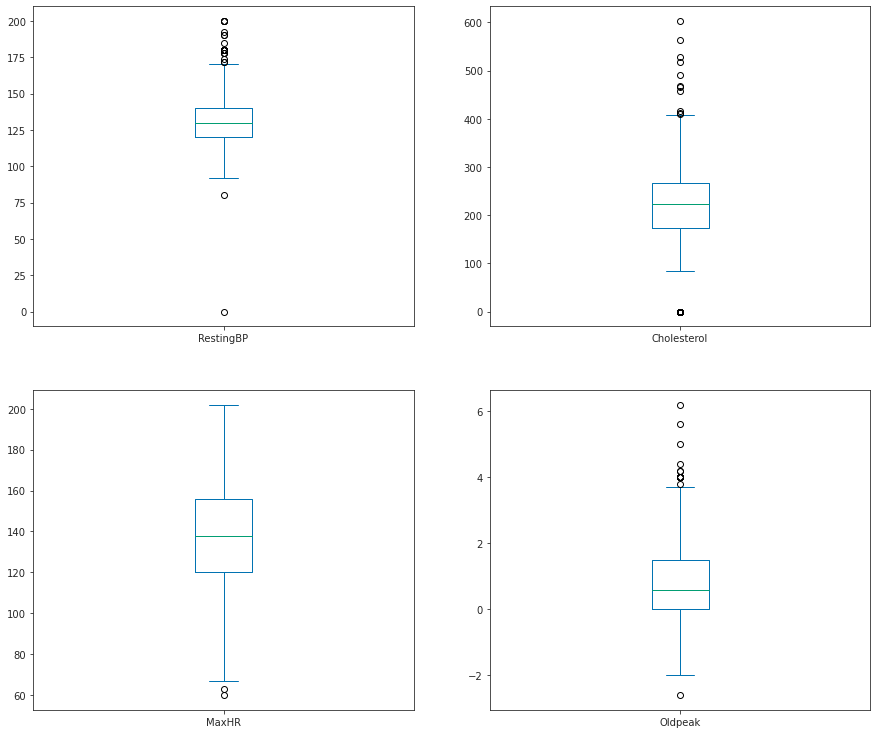

In [12]:
plt.figure(figsize=(15, 20))
check_out = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
i = 1

for x in check_out:
  plt.subplot(3,2,i)
  df[x].plot.box() 
  i+=1

In [13]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [14]:
RestingBP_outliers = detect_outliers_iqr(df['RestingBP'])
print("Outliers from RestingBP:", RestingBP_outliers)

Cholesterol_outliers = detect_outliers_iqr(df['Cholesterol'])
print("Outliers from Cholesterol:", Cholesterol_outliers)

MaxHR_outliers = detect_outliers_iqr(df['MaxHR'])
print("Outliers from MaxHR:", MaxHR_outliers)

Oldpeak_outliers = detect_outliers_iqr(df['Oldpeak'])
print("Outliers from Oldpeak:", Oldpeak_outliers)

Outliers from RestingBP: [0, 80, 172, 172, 174, 178, 178, 178, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 185, 190, 190, 192, 200, 200, 200, 200]
Outliers from Cholesterol: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 409, 412, 417, 458, 466, 468, 491, 518, 529, 564, 603]
Outliers from MaxHR: [60, 63]
Outliers from Oldpeak: [-2.6, 3.8, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.2, 4.2, 4.4, 5.0, 5.6, 6.2]


#### Seleksi row outliers

In [15]:
df[df['RestingBP'].isin(RestingBP_outliers)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1


In [16]:
df[df['Cholesterol'].isin(Cholesterol_outliers)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [17]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [18]:
df[df['MaxHR'].isin(MaxHR_outliers)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [19]:
df[df['Oldpeak'].isin(Oldpeak_outliers)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1


#### Replacing Outlier

In [20]:
# Mean Method
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Median Method
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')

# Most Frequent (Modes) Method
imp_modes = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#KNN Imputer
imp_knn = KNNImputer(n_neighbors=5)

In [21]:
df['MaxHR'] = df['MaxHR'].replace([63, 60], [220 - 60, 220 - 51]) #Replace MaxHR outlier dengan 220 dikurang umur

In [22]:
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].mean())

In [23]:
# drop
df = df[~df.Cholesterol.isin(Cholesterol_outliers)]

In [24]:
# drop minus value
df = df[df.Oldpeak >= 0]

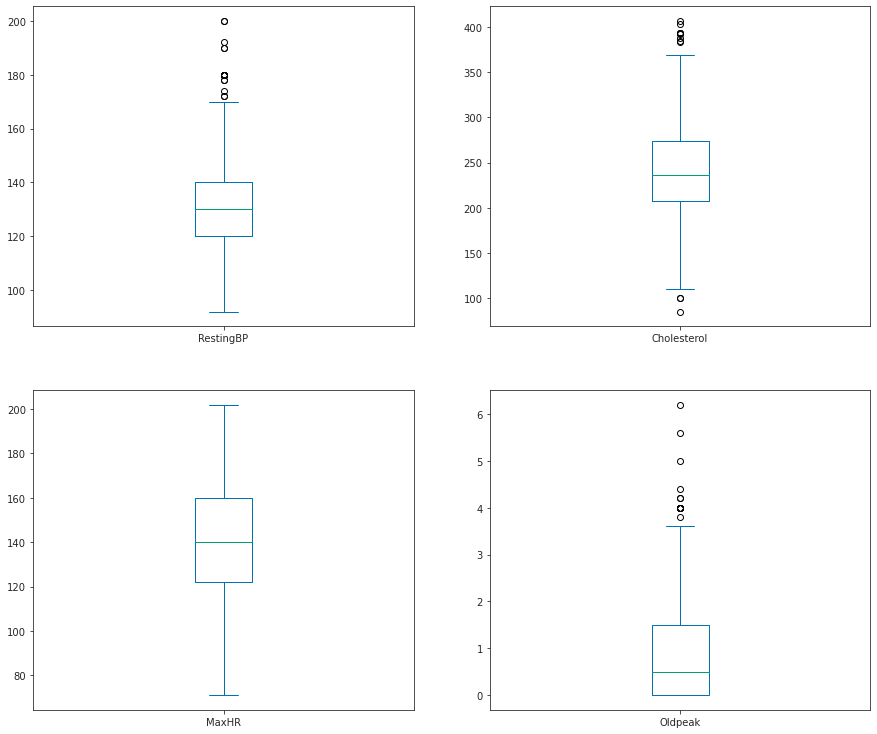

In [25]:
plt.figure(figsize=(15, 20))
check_out = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
i = 1

for x in check_out:
  plt.subplot(3,2,i)
  df[x].plot.box() 
  i+=1

### 3. Encoding Dataframe

In [26]:
#dataframe encoded
label_encoder = preprocessing.LabelEncoder()
df_encode = df.copy()

In [27]:
def label_encode_data(dataset):
  for columns in dataset.columns:
    if (dataset[columns].dtype == 'O'):
      dataset[columns] = label_encoder.fit_transform(dataset[columns])

label_encode_data(df_encode)

In [28]:
df_encode.info()
df_encode

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    int64  
 2   ChestPainType   734 non-null    int64  
 3   RestingBP       734 non-null    float64
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    int64  
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    int64  
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    int64  
 11  HeartDisease    734 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 74.5 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110.0,264,0,1,132,0,1.2,1,1
914,68,1,0,144.0,193,1,1,141,0,3.4,1,1
915,57,1,0,130.0,131,0,1,115,1,1.2,1,1
916,57,0,1,130.0,236,0,0,174,0,0.0,1,1


### 4. Analisis Data

#### Seleksi Fitur

##### Seleksi Univariate

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df_encode.copy()

X = data.iloc[:,0:11]  # Kolom-kolom independen
y = data.iloc[:,-1]    # Kolom target

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(12,'Score'))  

             Specs       Score
7            MaxHR  459.981777
9          Oldpeak  235.728279
8   ExerciseAngina  137.161268
2    ChestPainType  124.759516
0              Age  120.191903
4      Cholesterol   87.046031
10        ST_Slope   66.826483
3        RestingBP   50.685495
5        FastingBS   16.478312
1              Sex   15.174534
6       RestingECG    0.032735


#### Tingkat kepentingan fitur-fitur

[0.07585888 0.05267528 0.09477598 0.06816189 0.06209853 0.01940212
 0.04380618 0.08209921 0.17951998 0.10018099 0.22142096]


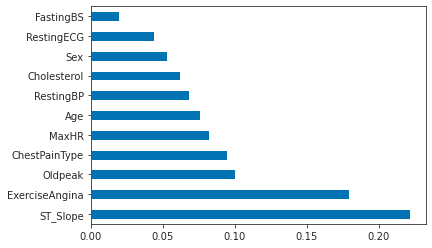

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

#### Matrix Korelasi

<AxesSubplot:>

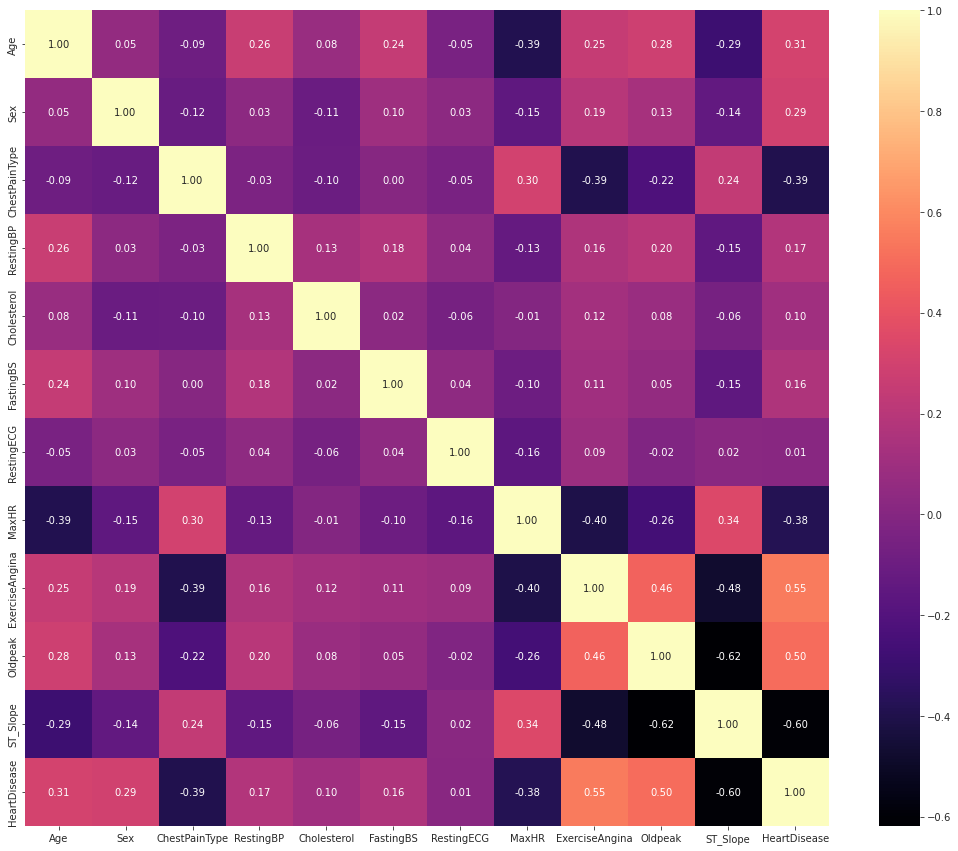

In [31]:
plt.figure(figsize=(18,15))
sns.heatmap(df_encode.corr(), annot=True, cmap="magma", fmt='.2f')

Text(0.5, 1.0, 'Shifted Linear Correlation Matrix')

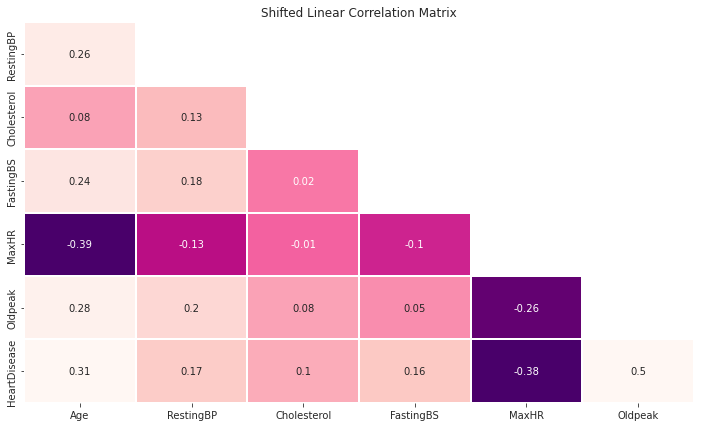

In [32]:
# shifted correlation matrix

corr_mat = df.corr().round(2)
f, ax = plt.subplots(figsize=(12,7))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
mask = mask[1:,:-1]
corr = corr_mat.iloc[1:,:-1].copy()
sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
            cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
ax.set_title('Shifted Linear Correlation Matrix')


### 5. Visualisasi Data

#### A. Countplot

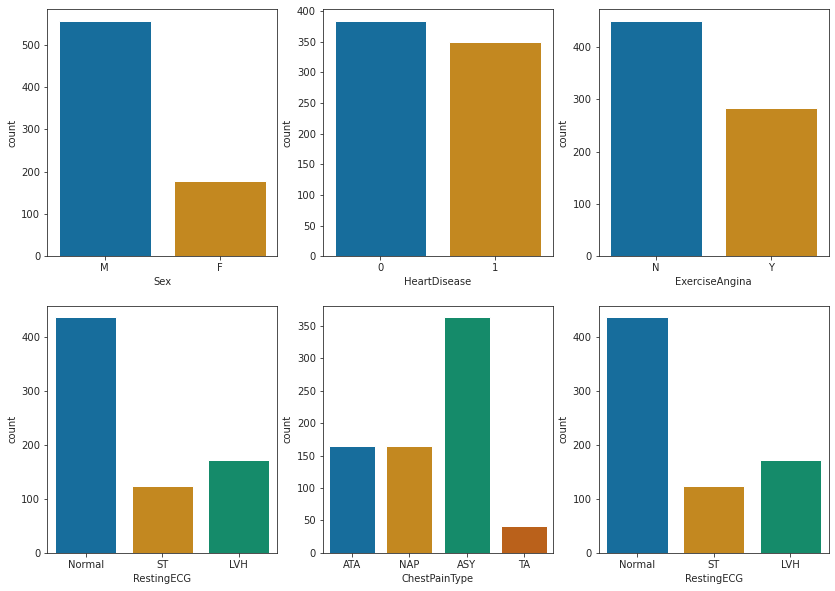

In [33]:
f, axes = plt.subplots(2, 3, figsize=(14, 10))

sns.countplot(data=df, x=df['Sex'], ax=axes[0,0])
sns.countplot(data=df, x=df['HeartDisease'], ax=axes[0,1])
sns.countplot(data=df, x=df['ExerciseAngina'], ax=axes[0,2])

sns.countplot(data=df, x=df['RestingECG'], ax=axes[1,0])
sns.countplot(data=df, x=df['ChestPainType'], ax=axes[1,1])
sns.countplot(data=df, x=df['RestingECG'], ax=axes[1,2])
plt.show()


Text(0.5, 1.0, 'Chest Pain Type v/s Disease\n')

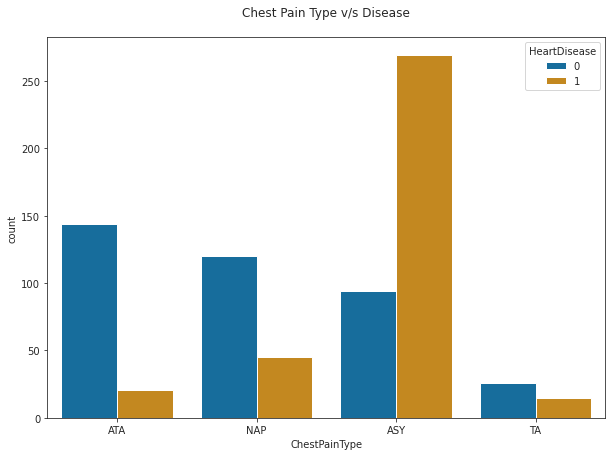

In [34]:
plt.figure(figsize=(10, 7))
sns.countplot(data= df, x='ChestPainType', hue='HeartDisease')
plt.title('Chest Pain Type v/s Disease\n')

Text(0.5, 1.0, 'Sex v/s Heart Disease\n')

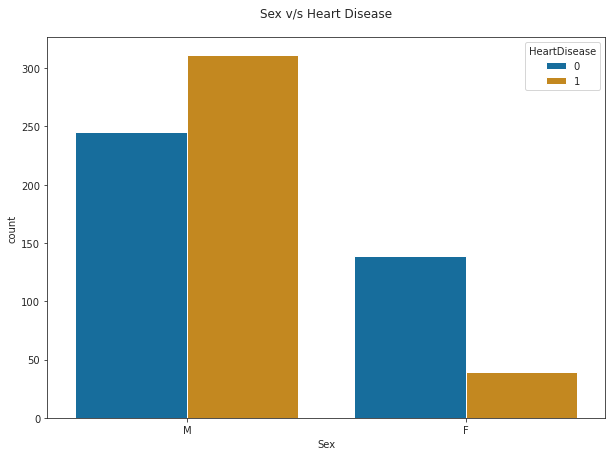

In [35]:
plt.figure(figsize=(10, 7))
sns.countplot(data= df, x='Sex', hue='HeartDisease')
plt.title('Sex v/s Heart Disease\n')

Text(0.5, 1.0, 'Exercise Angina v/s Heart Disease\n')

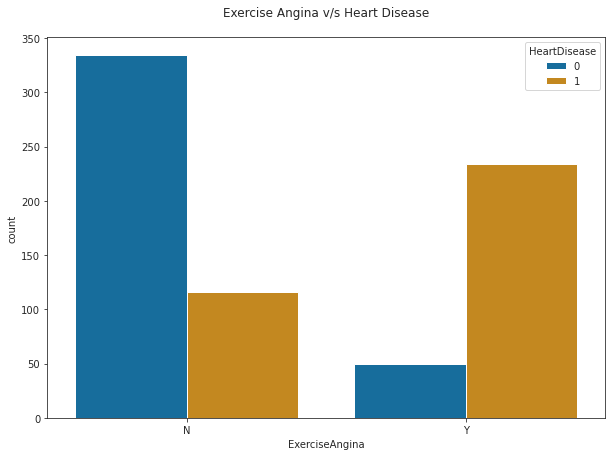

In [36]:
plt.figure(figsize=(10, 7))
sns.countplot(data= df, x='ExerciseAngina',hue='HeartDisease')
plt.title('Exercise Angina v/s Heart Disease\n')

Text(0.5, 1.0, 'ST Slope v/s Heart Disease\n')

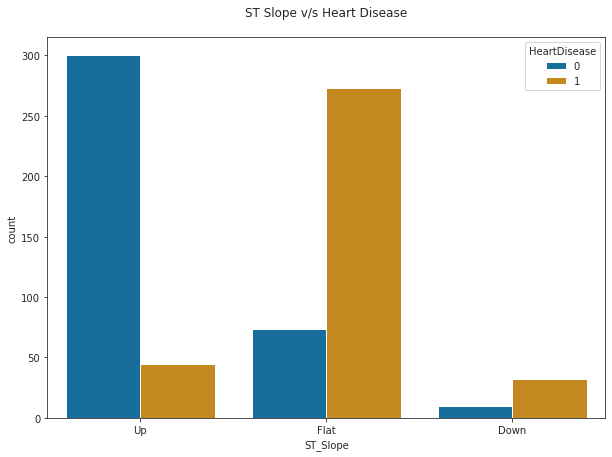

In [37]:
plt.figure(figsize=(10, 7))
sns.countplot(data= df, x='ST_Slope',hue='HeartDisease')
plt.title('ST Slope v/s Heart Disease\n')

#### B. Distribution plot

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umur Dari Pasien Pengidap Penyakit Jantung\n')

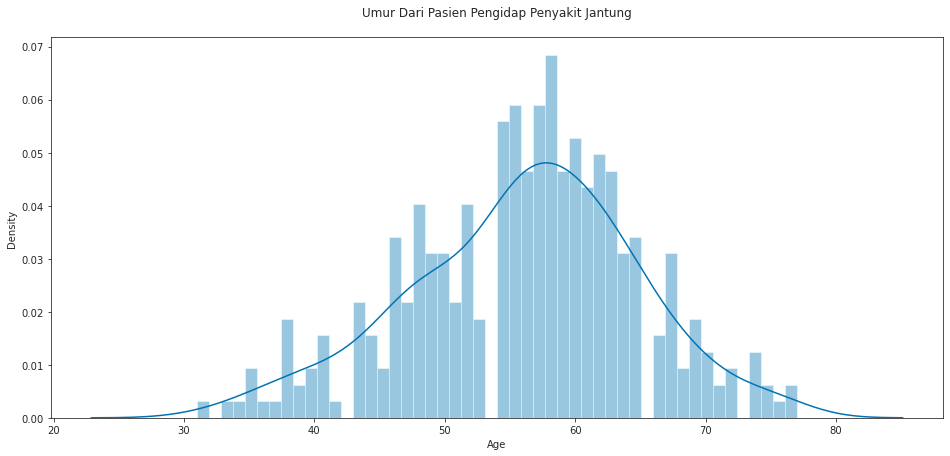

In [38]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['HeartDisease'] == 1]['Age'], kde = True, bins = 50)
plt.title('Umur Dari Pasien Pengidap Penyakit Jantung\n')

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Dari Pasien Pengidap Penyakit Jantung\n')

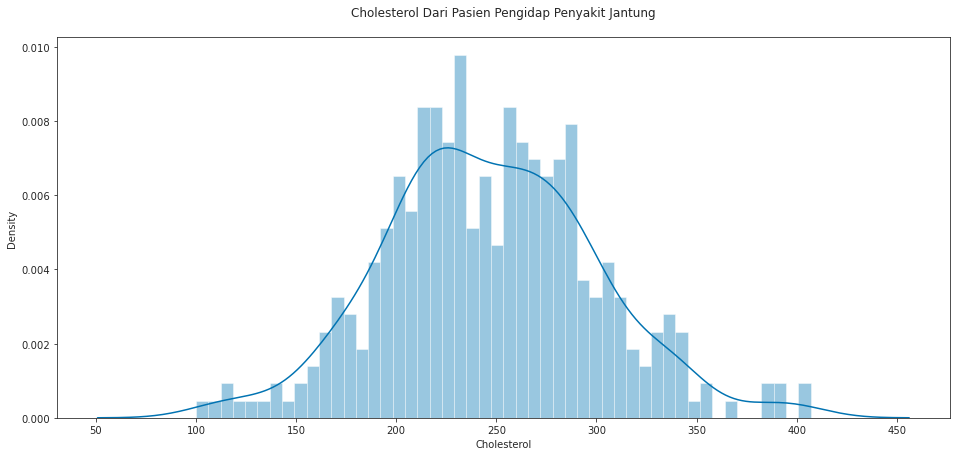

In [39]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['HeartDisease']==1]['Cholesterol'], kde=True, bins=50)
plt.title('Cholesterol Dari Pasien Pengidap Penyakit Jantung\n')

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Detak Jantung Maksimal Dari Pasien Pengidap Penyakit Jantung\n')

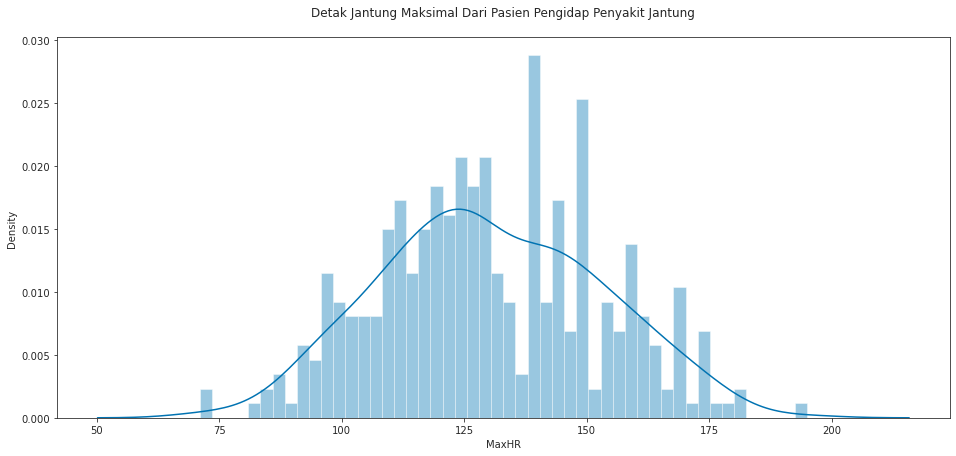

In [40]:
plt.figure(figsize=(16, 7))
sns.distplot(df[df['HeartDisease'] == 1]['MaxHR'], kde=True, bins=50)
plt.title('Detak Jantung Maksimal Dari Pasien Pengidap Penyakit Jantung\n')


/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Oldpeak Dari Pasien Pengidap Penyakit Jantung\n')

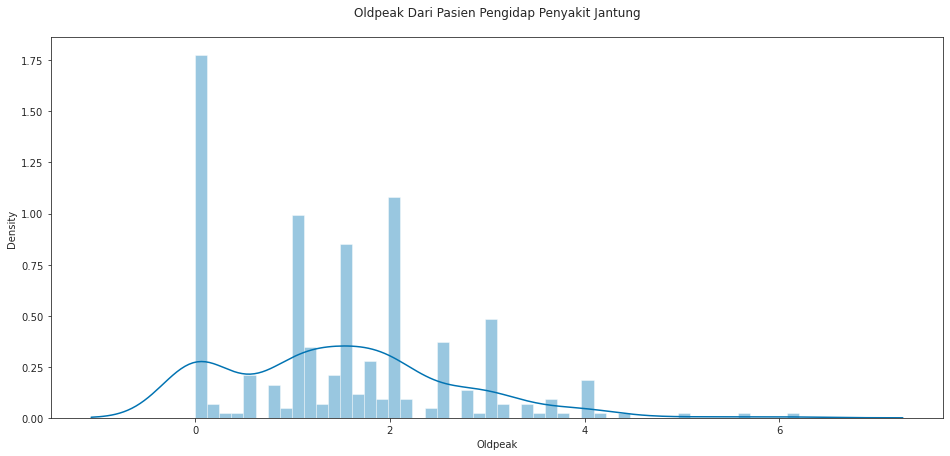

In [41]:
plt.figure(figsize=(16, 7))
sns.distplot(df[df['HeartDisease'] == 1]['Oldpeak'], kde=True, bins=50)
plt.title('Oldpeak Dari Pasien Pengidap Penyakit Jantung\n')


/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Exercise Angina (No)')

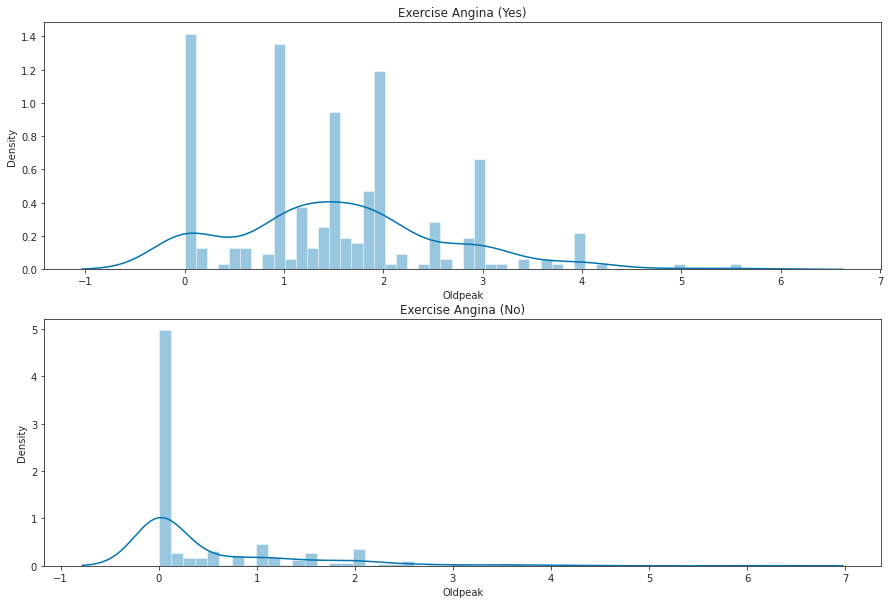

In [42]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.distplot(df[df['ExerciseAngina'] == "Y"]['Oldpeak'], kde=True, bins=50)
plt.title('Exercise Angina (Yes)')


plt.subplot(2, 1, 2)
sns.distplot(df[df['ExerciseAngina'] == "N"]['Oldpeak'], kde=True, bins=50)
plt.title('Exercise Angina (No)')


#### C. Jointplot (1 Heart Disease)

In [43]:
# ambil baris untuk pengidap heart disease
df_encode2 = df_encode[df_encode['HeartDisease'] == 1 ][df_encode.columns] 

In [44]:
df_encode2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,0,2,160.0,180,0,1,156,0,1.0,1,1
3,48,0,0,138.0,214,0,1,108,1,1.5,1,1
8,37,1,0,140.0,207,0,1,130,1,1.5,1,1
11,58,1,1,136.0,164,0,2,99,1,2.0,1,1
13,49,1,0,140.0,234,0,1,140,1,1.0,1,1


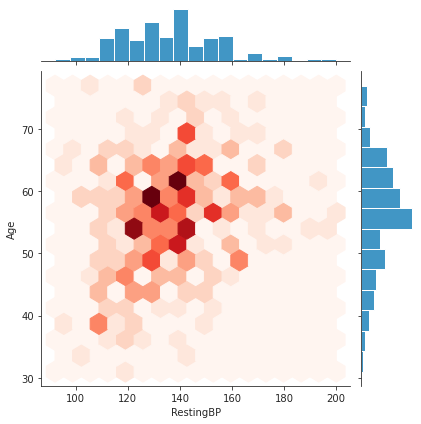

In [45]:
sns.jointplot(data=df_encode2,
              x='RestingBP',
              y='Age',
              kind='hex',
              cmap='Reds'
              )

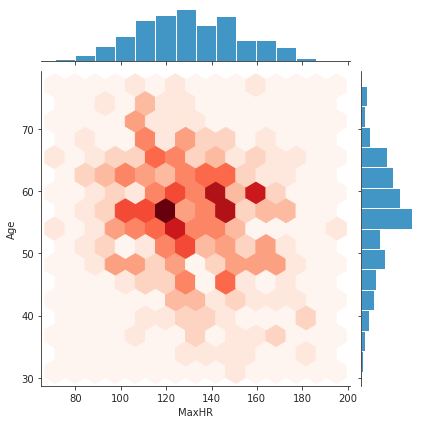

In [46]:
sns.jointplot(data=df_encode2,
              x='MaxHR',
              y='Age',
              kind='hex',
              cmap='Reds'
              )

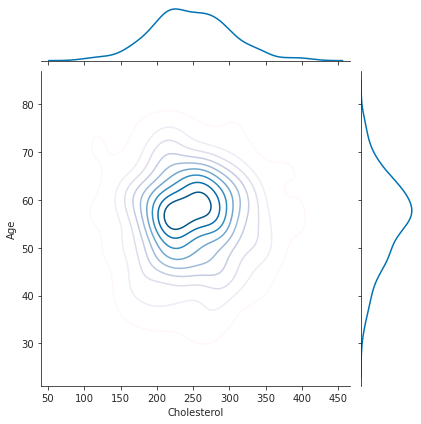

In [47]:
sns.jointplot(data=df_encode2,
              x='Cholesterol',
              y='Age',
              kind='kde',
              cmap='PuBu'
              )

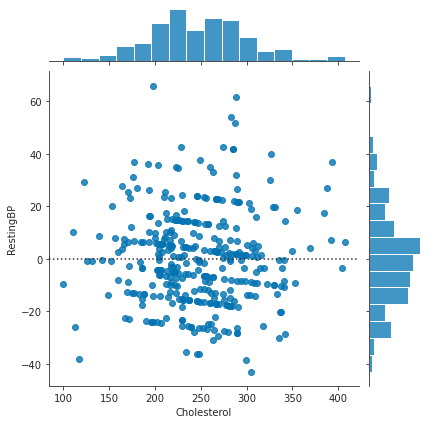

In [48]:
sns.jointplot(data=df_encode2,
              x='Cholesterol',
              y='RestingBP',
              kind='resid',
              )

#### D. Violinplot / Boxplot

<AxesSubplot:xlabel='ChestPainType', ylabel='Cholesterol'>

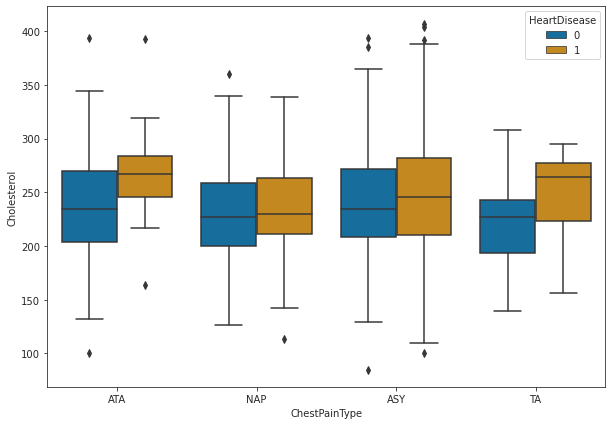

In [49]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='ChestPainType', y='Cholesterol', hue='HeartDisease')


<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

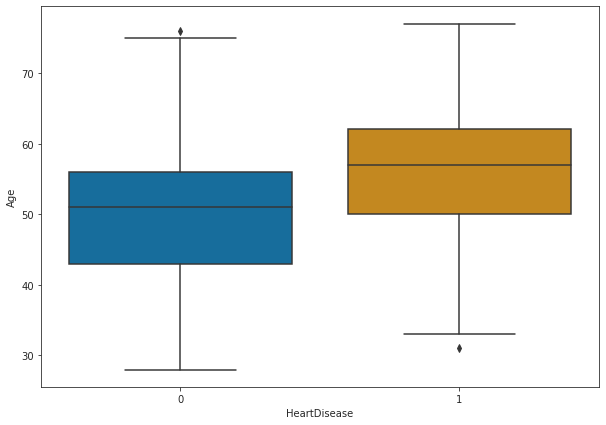

In [50]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='HeartDisease', y='Age')


<AxesSubplot:xlabel='FastingBS', ylabel='RestingBP'>

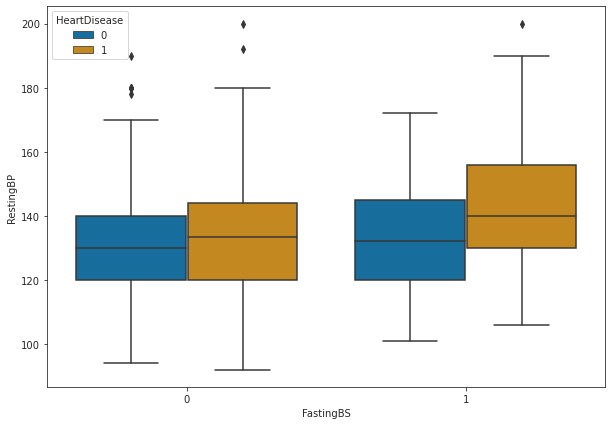

In [51]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='FastingBS', y='RestingBP', hue='HeartDisease')


<AxesSubplot:xlabel='ST_Slope', ylabel='Cholesterol'>

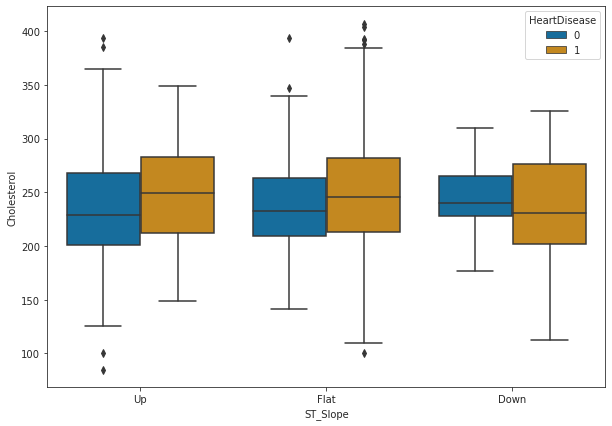

In [52]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='ST_Slope', y='Cholesterol', hue='HeartDisease')


<AxesSubplot:xlabel='ExerciseAngina', ylabel='Oldpeak'>

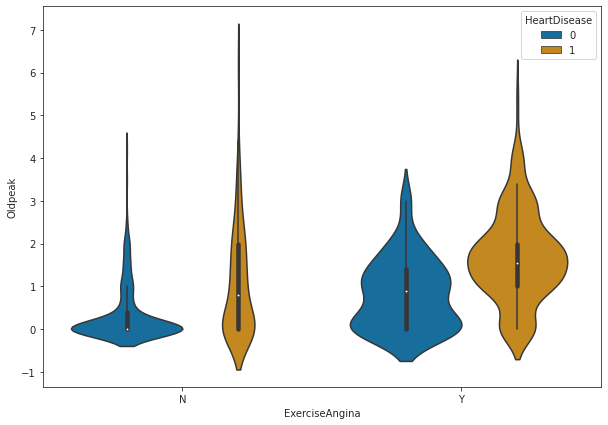

In [53]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df,x='ExerciseAngina',y='Oldpeak',hue='HeartDisease')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Age'>

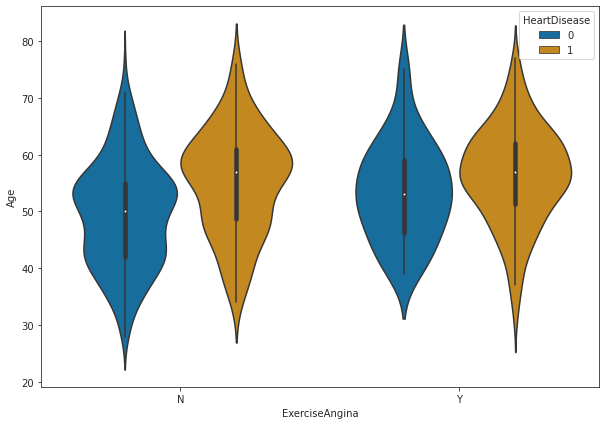

In [54]:
plt.figure(figsize=(10, 7))
sns.violinplot(data=df, x='ExerciseAngina', y='Age', hue='HeartDisease')


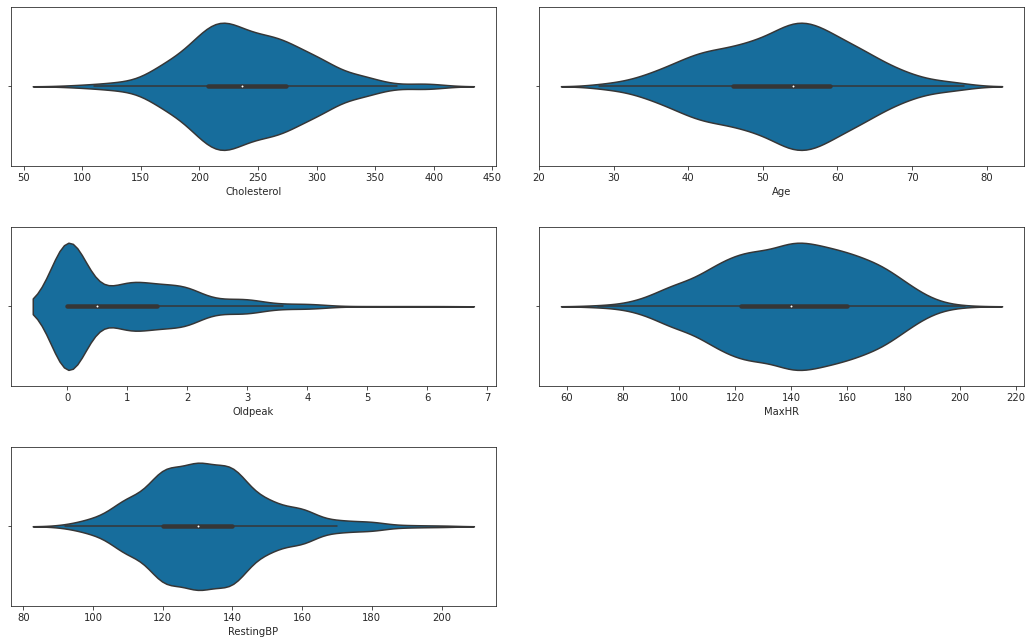

In [55]:
figure_1 = plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.violinplot(data=df, x="Cholesterol")
plt.subplot(3, 2, 2)
sns.violinplot(data=df, x="Age")
plt.subplot(3, 2, 3)
sns.violinplot(data=df, x="Oldpeak")
plt.subplot(3, 2, 4)
sns.violinplot(data=df, x="MaxHR")
plt.subplot(3, 2, 5)
sns.violinplot(data=df, x="RestingBP")
plt.suptitle("")

figure_1.tight_layout(pad=3.0)

plt.show()


#### E. Pairplot

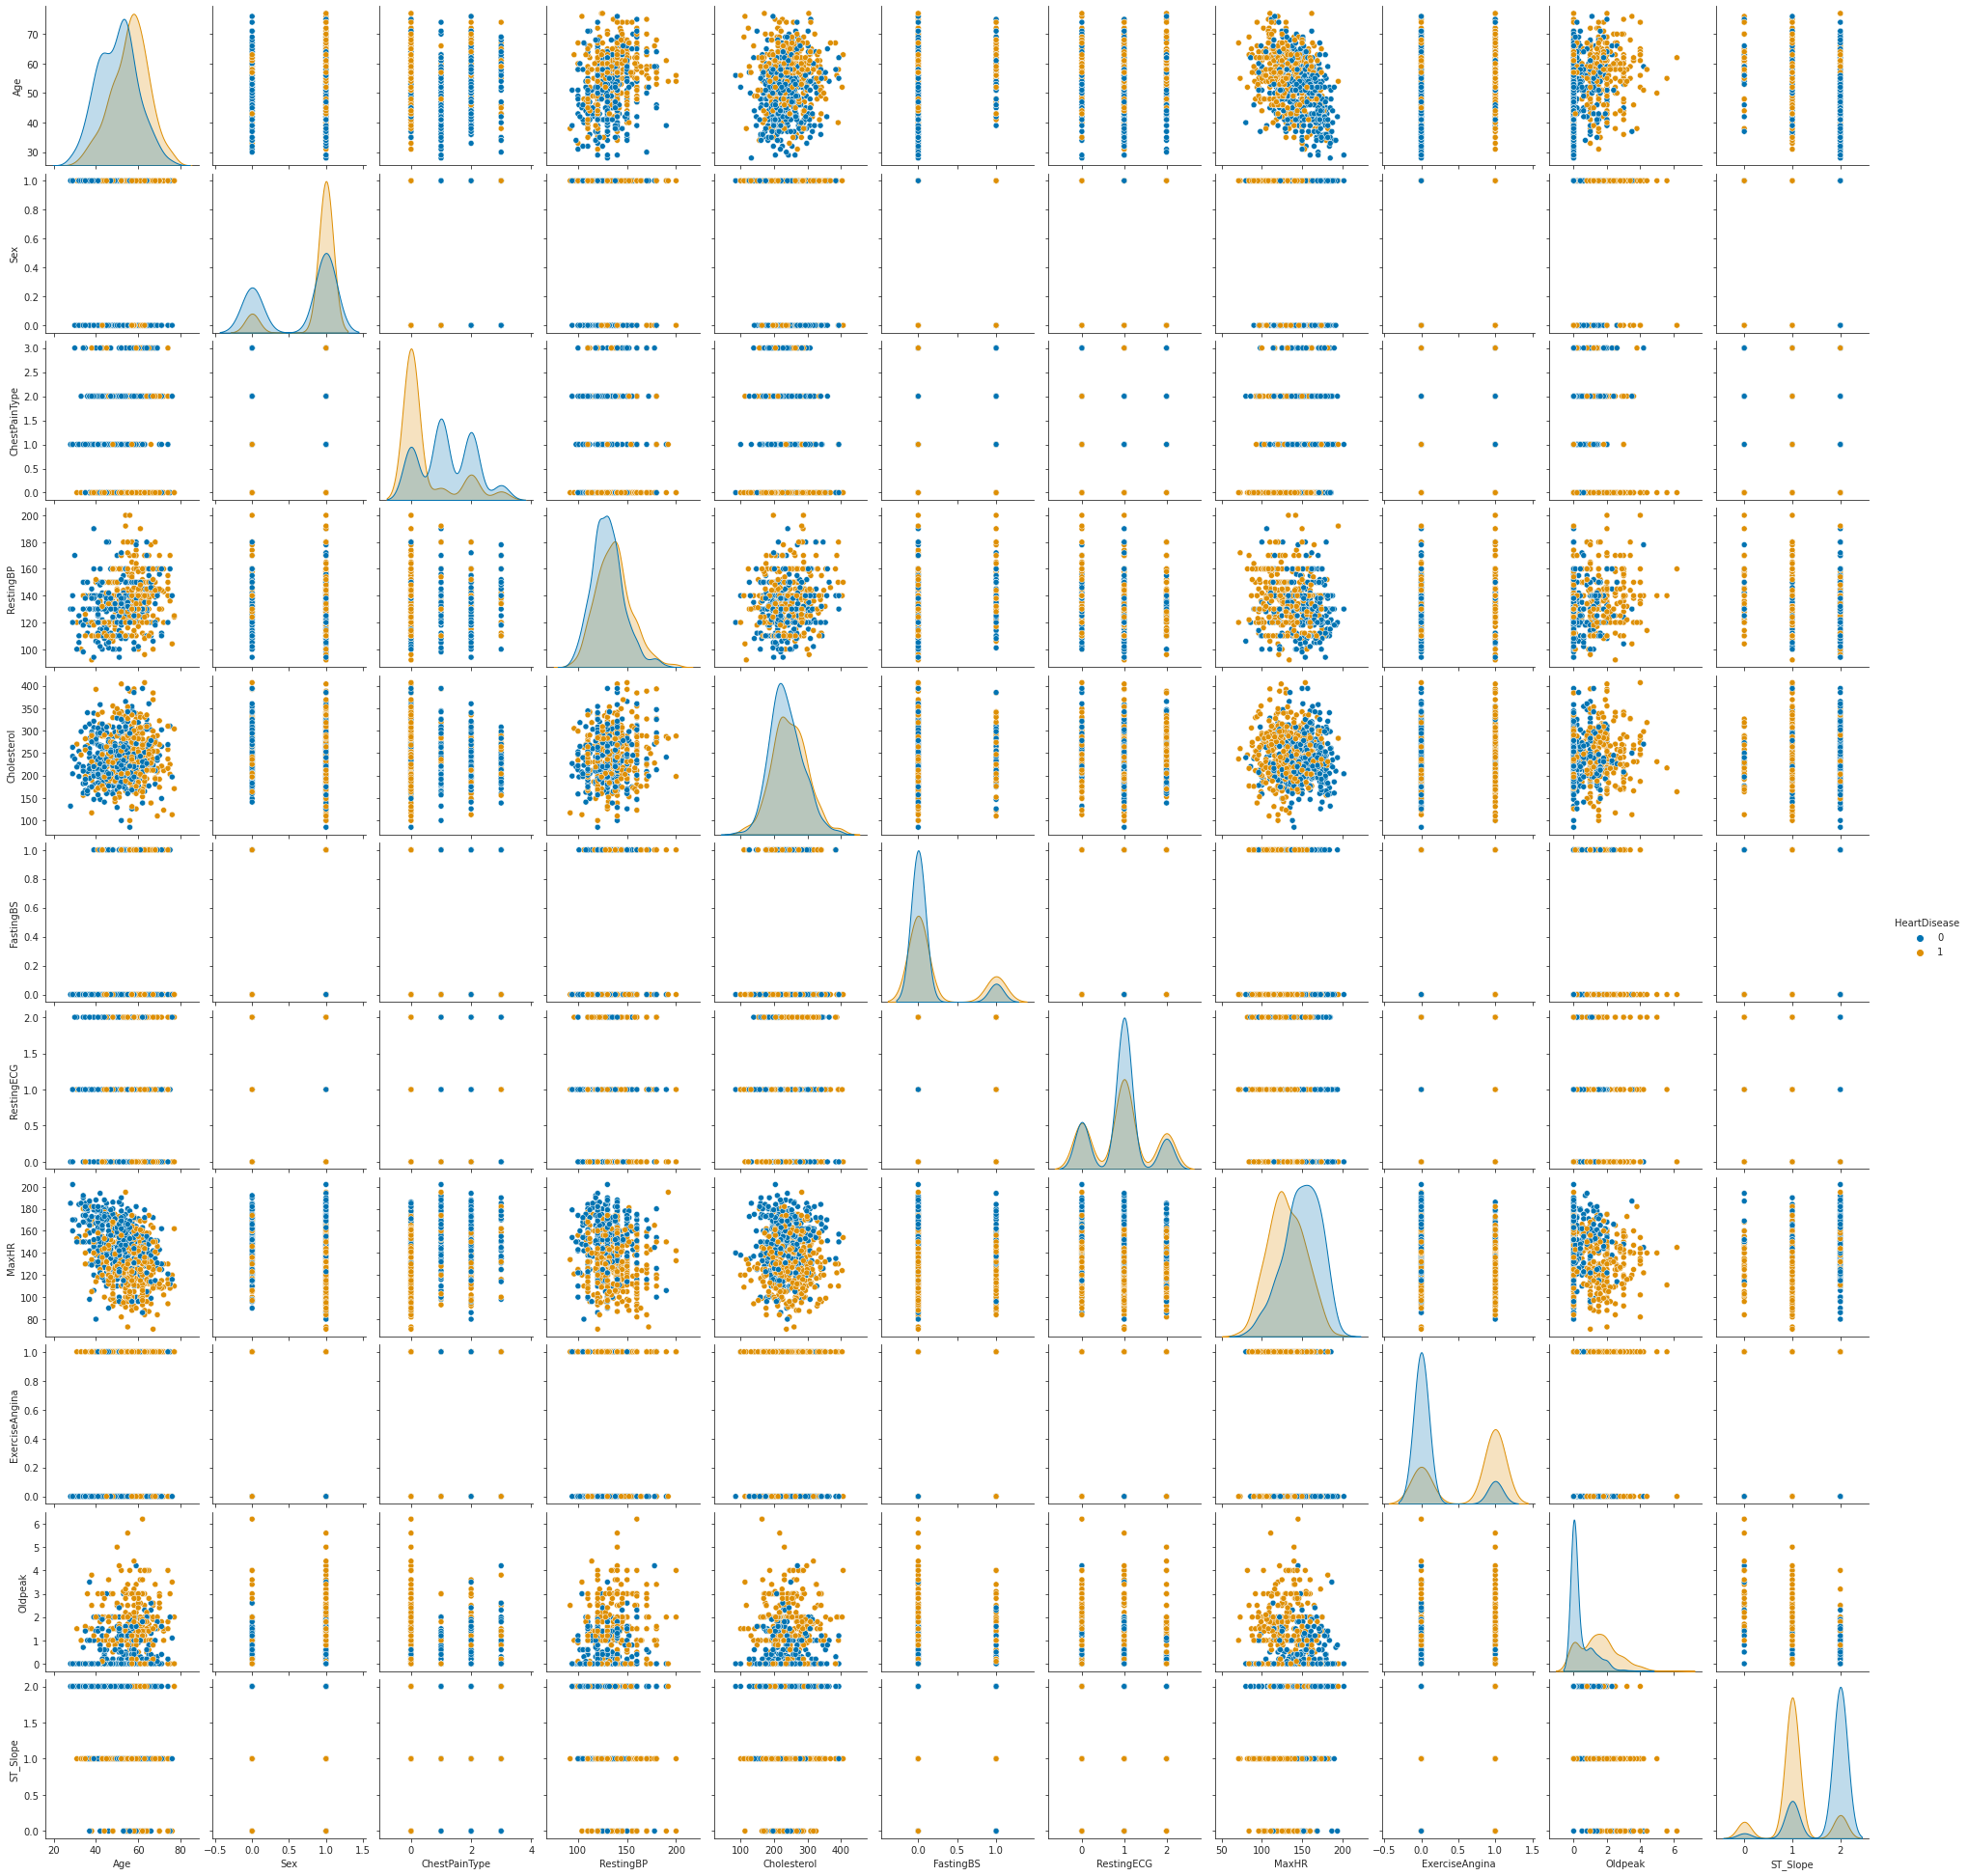

In [56]:
sns.pairplot(df_encode, hue="HeartDisease")


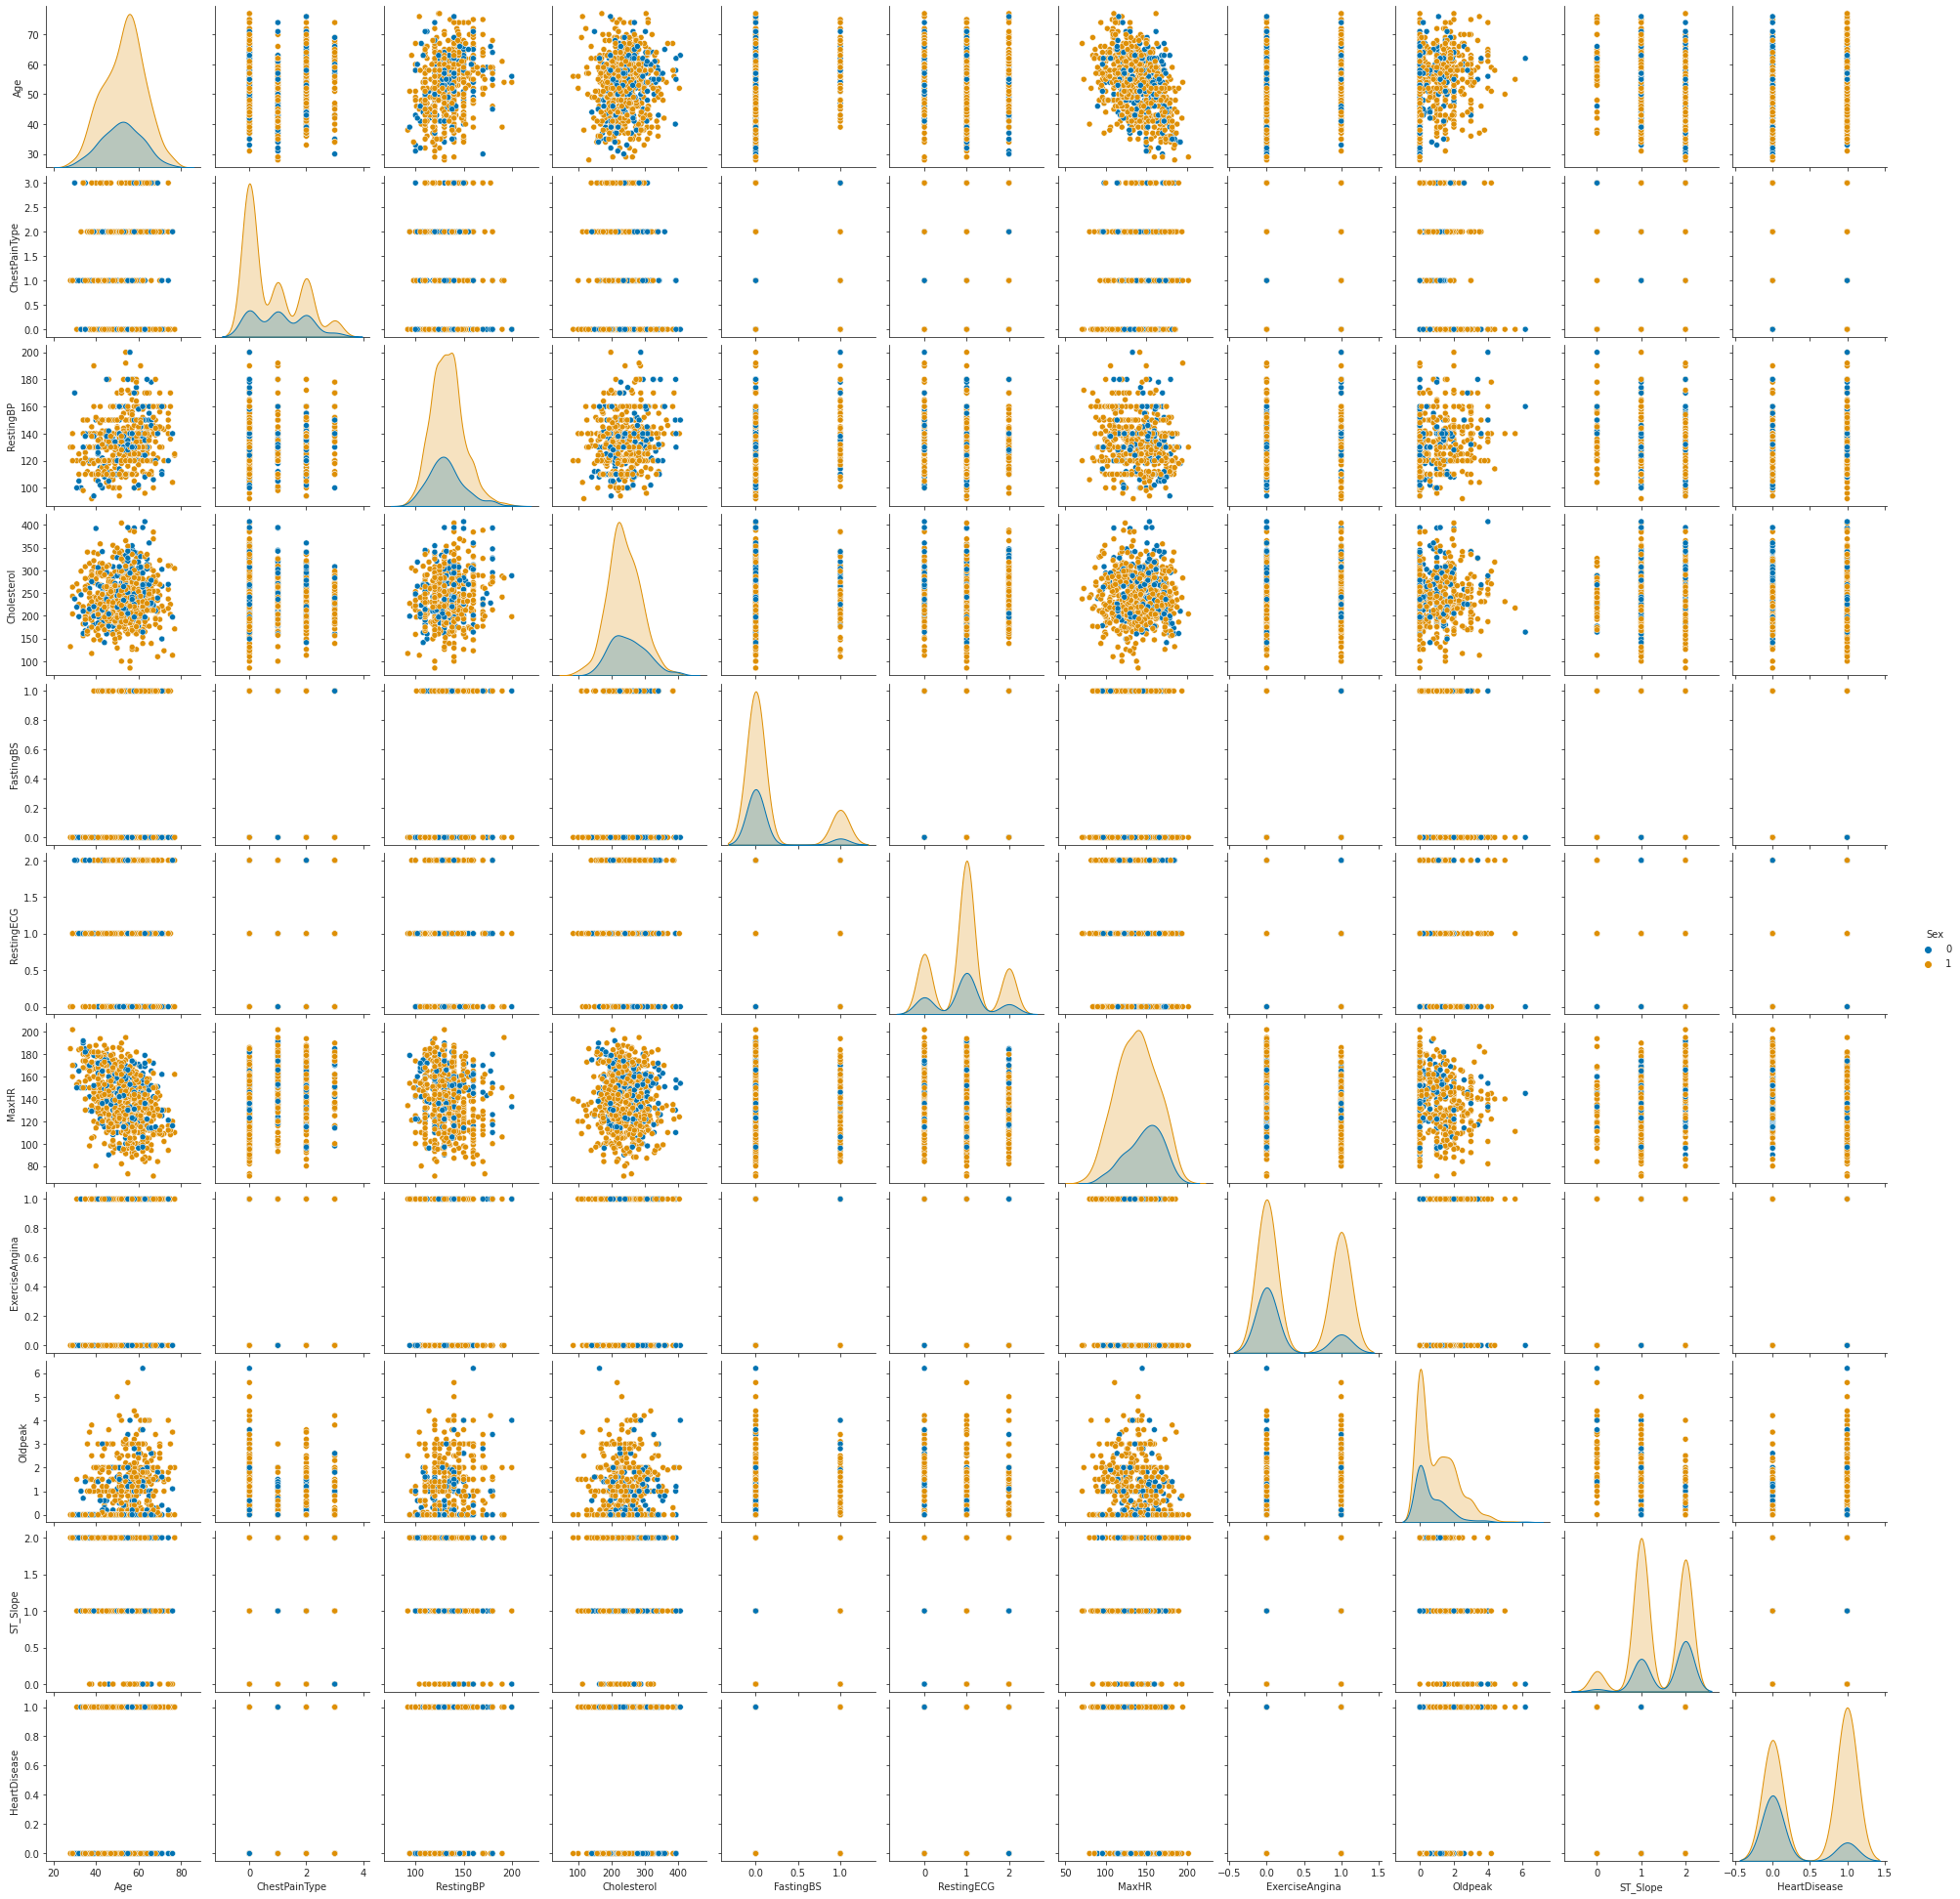

In [57]:
sns.pairplot(df_encode, hue="Sex")
